# 9 绘图与可视化

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 要启用交互式绘图，需要执行以下命令
#%matplotlib notebook

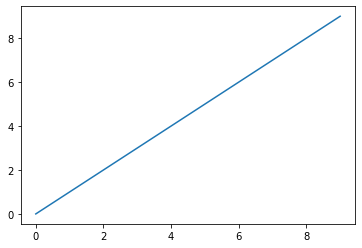

In [2]:
data = np.arange(10)
plt.plot(data)
plt.show()

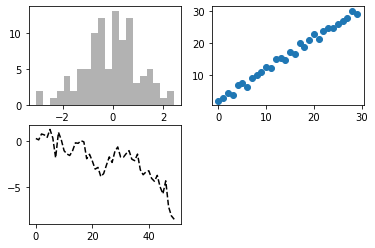

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.rand(30))
# 下面一条命令会在最后一个子图中绘制图表
plt.plot(np.random.randn(50).cumsum(), 'k--')
plt.show()

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

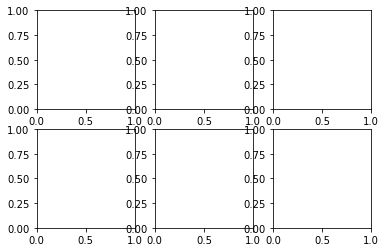

In [4]:
fig, axes = plt.subplots(2, 3)
axes

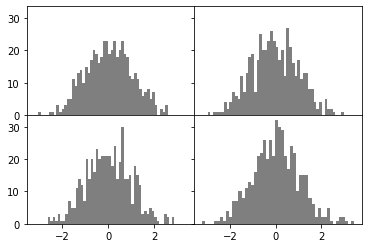

In [5]:
# 调整子图周围的间距
# subplots_adjust
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

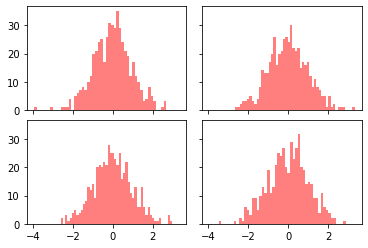

In [6]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='r', alpha=0.5)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

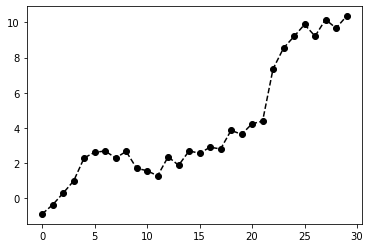

In [7]:
# 颜色、标记和线类型
plt.plot(np.random.randn(30).cumsum(), 'ko--')
plt.show()

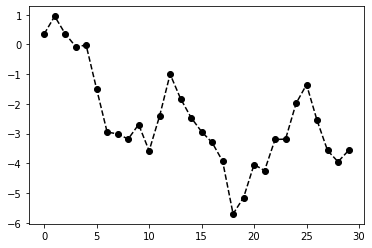

In [8]:
# 上面的代码可以写的更为显式
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
plt.show()

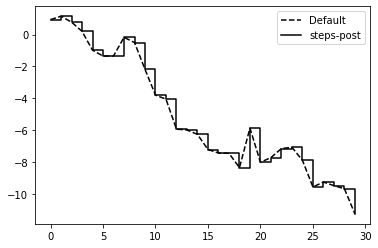

In [9]:
# 对于折线图，注意到后续的点都是线性内插的，可以通过drawstyle选项进行更改
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

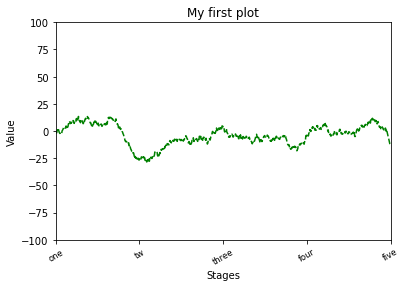

In [10]:
# 设置标题、轴标签、刻度和刻度标签
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'tw', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_xlim([0, 1000])
ax.set_ylim([-100, 100])
ax.set_title('My first plot')
ax.set_xlabel('Stages')
ax.set_ylabel('Value')
ax.plot(np.random.randn(1000).cumsum(), color='g', linestyle='dashed')
plt.show()

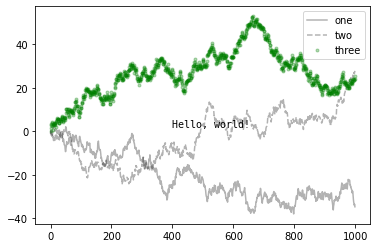

In [11]:
# 添加图例
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one', alpha=0.3)
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two', alpha=0.3)
ax.plot(np.random.randn(1000).cumsum(), 'g.', label='three', alpha=0.3)
ax.legend(loc='best')
# 注释与加工子图
ax.text(400, 2, 'Hello, world!', family='monospace', fontsize=10)
plt.show()

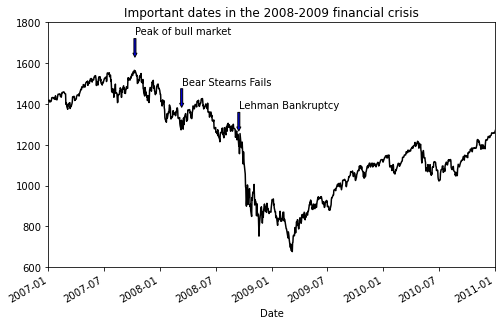

In [12]:
# 注释与子图加工 金融危机中的重要日期
from datetime import datetime

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
data = pd.read_csv("./examples/spx.csv", index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'),
               (datetime(2008, 3, 12), 'Bear Stearns Fails'),
               (datetime(2008, 9, 15), 'Lehman Bankruptcy')]
for date, label in crisis_data:
    # ax.annotate可以在指定的x, y坐标上绘制标签
    ax.annotate(label,
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='blue', headwidth=4, width=2, headlength=4),
                horizontalalignment='left',
                verticalalignment='top')
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title("Important dates in the 2008-2009 financial crisis")
plt.show()

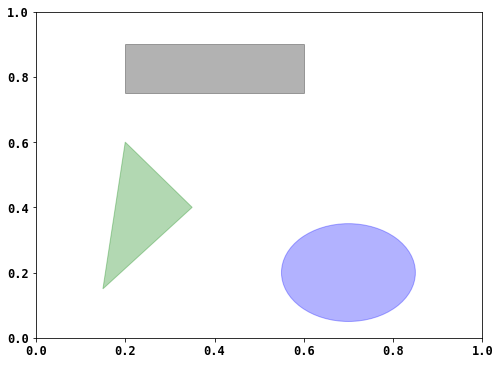

In [26]:
# 想在图表中添加图形时，需要生成patch对象shp，并调用ax.add_patch(shp)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.3)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
# 将图片保存到文件
# dpi：每英寸像素点数， bbox_inches可以剪去实际图形的空白，tight使用最小空白
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
plt.show()

In [25]:
# matplotlib中所有的行为都可通过广泛的全局参数来定制
# 例如设置图片的大小，全局都设置为（10x8）
plt.rc('figure', figsize=(8, 6))
# rc的第一个参数是想要自定义的组件，比如figure，axes，xtick，ytick，grid，legend等，
# 之后可以按照关键字参数的序列指定新的参数
font_options = {'family': 'monospace',
                'weight': 'bold',
                'size': 12
                }
plt.rc('font', **font_options)

## 9.2 使用pandas和seaborn绘图